In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

ModuleNotFoundError: No module named 'tensorflow'

Read The Data

In [3]:
data = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


Train The Data

In [4]:
(X_train, Y_train), (X_test, Y_test) = data

In [5]:
X_train.shape, Y_train.shape,X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [9]:
X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

Selection For The Best Featues

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca_machine_learning = PCA()
pca_machine_learning.fit_transform(X_train)

array([[-1.63225950e+03,  6.95904885e+02,  3.82936183e+02, ...,
        -1.94383396e-01, -2.96716275e-01, -8.91909421e-02],
       [ 2.11594763e+02, -2.42235521e+02,  1.53095691e+03, ...,
         2.76508201e-02,  1.47062424e-01, -1.96606511e-01],
       [ 1.97120094e+03, -2.93813609e+03, -7.02173229e+02, ...,
        -2.66373278e-01, -5.45969636e-02, -1.00334729e-01],
       ...,
       [ 1.80373380e+02, -2.89234292e+03, -1.00448294e+02, ...,
        -9.69870999e-02,  4.75402487e-01,  3.69202335e-01],
       [ 2.89881680e+03, -8.60874301e+02,  1.41938040e+03, ...,
        -1.19109692e-01,  1.89968105e-01, -4.26015893e-01],
       [ 1.06916310e+03, -3.01968063e+02, -1.13372056e+03, ...,
         2.46831906e-01,  6.12928127e-02, -7.15290870e-03]])

In [21]:
pca_machine_learning.explained_variance_.shape

(3072,)

In [22]:
i = 0
TOTAL_SUM = sum(pca_machine_learning.explained_variance_)
SUM = 0

while(SUM / TOTAL_SUM < 0.98):
    SUM += pca_machine_learning.explained_variance_[i]
    i = i + 1
i

444

Applying PCA With i Which Is Calcuated Above

In [23]:
pca_machine_learning = PCA(n_components = i, whiten = True, svd_solver = 'randomized')

X_train = pca_machine_learning.fit_transform(X_train)
X_test = pca_machine_learning.transform(X_test)

Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
Y_pred = logistic_regression.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [33]:
Accuracy_of_Logistic_Regression = accuracy_score(Y_test, Y_pred) * 100
print ("Accuracy of Logistic Regression Model:", Accuracy_of_Logistic_Regression)

Accuracy of Logistic Regression Model: 40.86


In [30]:
from sklearn.metrics import recall_score

In [34]:
Recall_Score_of_Logistic_Regression = recall_score(Y_test, Y_pred, average='macro') * 100
print ("Recall Score of Logistic Regression Model:", Recall_Score_of_Logistic_Regression)

Recall Score of Logistic Regression Model: 40.86


In [32]:
from sklearn.metrics import precision_score

In [35]:
Precision_Score_of_Logistic_Regression = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of Logistic Regression Model:", Precision_Score_of_Logistic_Regression)

Precision Score of Logistic Regression Model: 40.44070119956945


In [36]:
from sklearn.metrics import f1_score

In [37]:
F1_Score_of_Logistic_Regression = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of Logistic Regression Model:", F1_Score_of_Logistic_Regression)

F1 Score of Logistic Regression Model: 40.556657774209434


KNN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [51]:
Y_pred = KNN.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
Accuracy_of_KNN = (accuracy_score(Y_pred, Y_test)) * 100
print ("Accuracy of KNN Model:", Accuracy_of_KNN)

Accuracy of KNN Model: 17.37


In [54]:
from sklearn.metrics import recall_score

In [55]:
Recall_Score_of_KNN = recall_score(Y_test, Y_pred, average='macro')*100
print ("Recall Score of KNN Model:", Recall_Score_of_KNN)

Recall Score of KNN Model: 17.37


In [56]:
from sklearn.metrics import precision_score

In [57]:
Precision_Score_of_KNN = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of KNN Model:", Precision_Score_of_KNN)

Precision Score of KNN Model: 46.00300725433149


In [58]:
from sklearn.metrics import f1_score

In [59]:
F1_Score_of_KNN = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of KNN Model:", F1_Score_of_KNN)

F1 Score of KNN Model: 10.586914431529415


# Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
Random_Forest_Classifier = RandomForestClassifier()
Random_Forest_Classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [62]:
Y_pred = Random_Forest_Classifier.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

In [67]:
Accuracy_of_Random_Forest_Classifier = accuracy_score(Y_test, Y_pred) * 100
print ("Accuracy of Random Forest Classifier Model:", Accuracy_of_Random_Forest_Classifier)

Accuracy of Random Forest Classifier Model: 40.510000000000005


In [68]:
from sklearn.metrics import recall_score

In [69]:
Recall_Score_of_Random_Forest_Classifier = recall_score(Y_test, Y_pred, average='macro') * 100
print ("Recall Score of Random Forest Classifier Model:", Recall_Score_of_Random_Forest_Classifier)

Recall Score of Random Forest Classifier Model: 40.510000000000005


In [70]:
from sklearn.metrics import precision_score

In [74]:
Precision_Score_of_Random_Forest_Classifier = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of Random Forest Classifier Model:", Precision_Score_of_Random_Forest_Classifier)

Precision Score of Random Forest Classifier Model: 40.08396979039524


In [72]:
from sklearn.metrics import f1_score

In [75]:
F1_Score_of_Random_Forest_Classifier = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of Random Forest Classifier Model:", F1_Score_of_Random_Forest_Classifier)

F1 Score of Random Forest Classifier Model: 40.160462713221975


Comparsion Between Logistic Regression, KNN And Random Forest Classifier Model

In [76]:
print("Accuray of Logistic Regression Model: ", Accuracy_of_Logistic_Regression)
print("Accuray of KNN Model: ", Accuracy_of_KNN)
print("Accuray of Random Forest Classifier Model: ", Accuracy_of_Random_Forest_Classifier)

Accuray of Logistic Regression Model:  40.86
Accuray of KNN Model:  17.37
Accuray of Random Forest Classifier Model:  40.510000000000005


In [77]:
x = ['Logistic Regression','KNN','Random Forest Classifier']
y = [Accuracy_of_Logistic_Regression, Accuracy_of_KNN, Accuracy_of_Random_Forest_Classifier]
y

[40.86, 17.37, 40.510000000000005]

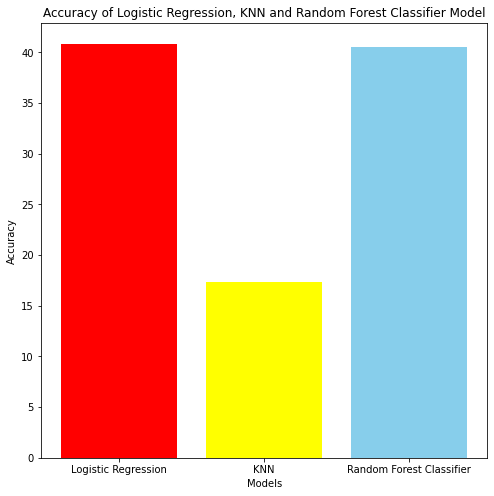

In [80]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['red', 'yellow', 'skyblue'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title("Accuracy of Logistic Regression, KNN and Random Forest Classifier Model")
plt.show()

In [83]:
print("Recall Score of Logistic Regression Model: ", Recall_Score_of_Logistic_Regression)
print("Recall Score of KNN Model: ", Recall_Score_of_KNN)
print("Recall Score of Random Forest Classifier Model:", Recall_Score_of_Random_Forest_Classifier)


Recall Score of Logistic Regression Model:  40.86
Recall Score of KNN Model:  17.37
Recall Score of Random Forest Classifier Model: 40.510000000000005


In [84]:
x = ['Logistic Regression','KNN','Random Forest Classifier']
y = [Recall_Score_of_Logistic_Regression, Recall_Score_of_KNN, Recall_Score_of_Random_Forest_Classifier]
y

[40.86, 17.37, 40.510000000000005]

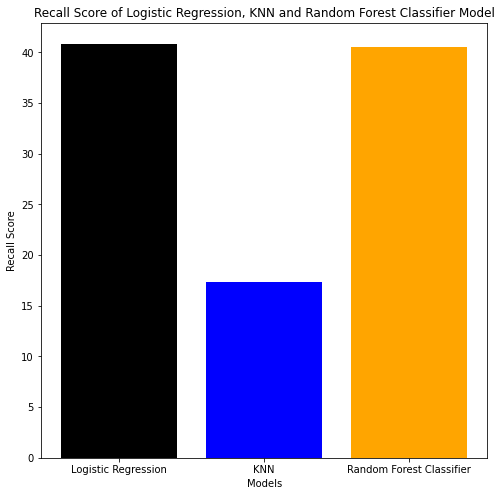

In [85]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['black', 'blue', 'orange'])
plt.xlabel('Models')
plt.ylabel("Recall Score")
plt.title("Recall Score of Logistic Regression, KNN and Random Forest Classifier Model")
plt.show()

In [86]:
print("Precision Score of Logistic Regression Model: ", Precision_Score_of_Logistic_Regression)
print("Precision Score of KNN Model: ", Precision_Score_of_KNN)
print ("Precision Score of Random Forest Classifier Model:", Precision_Score_of_Random_Forest_Classifier)

Precision Score of Logistic Regression Model:  40.44070119956945
Precision Score of KNN Model:  46.00300725433149
Precision Score of Random Forest Classifier Model: 40.08396979039524


In [87]:
x = ['Logistic Regression','KNN','Random Forest Classifier']
y = [Precision_Score_of_Logistic_Regression, Precision_Score_of_KNN, Precision_Score_of_Random_Forest_Classifier]
y

[40.44070119956945, 46.00300725433149, 40.08396979039524]

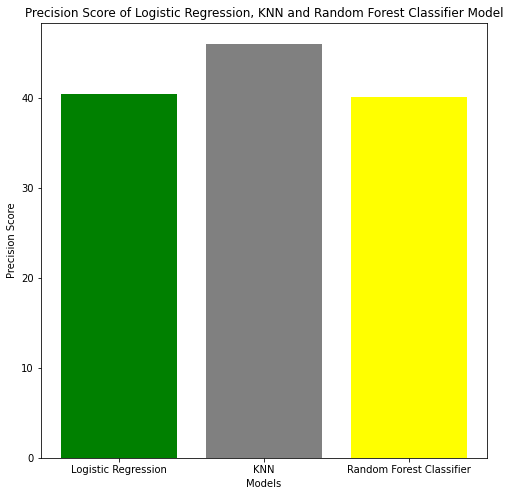

In [88]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['green', 'grey', 'yellow'])
plt.xlabel('Models')
plt.ylabel("Precision Score")
plt.title("Precision Score of Logistic Regression, KNN and Random Forest Classifier Model")
plt.show()

In [89]:
print("F1 Score of Logistic Regression Model: ", F1_Score_of_Logistic_Regression)
print("F1 Score of KNN Model: ", F1_Score_of_KNN)
print ("F1 Score of Random Forest Classifier Model:", F1_Score_of_Random_Forest_Classifier)

F1 Score of Logistic Regression Model:  40.556657774209434
F1 Score of KNN Model:  10.586914431529415
F1 Score of Random Forest Classifier Model: 40.160462713221975


In [90]:
x = ['Logistic Regression','KNN','Random Forest Classifier']
y = [F1_Score_of_Logistic_Regression, F1_Score_of_KNN, F1_Score_of_Random_Forest_Classifier]
y

[40.556657774209434, 10.586914431529415, 40.160462713221975]

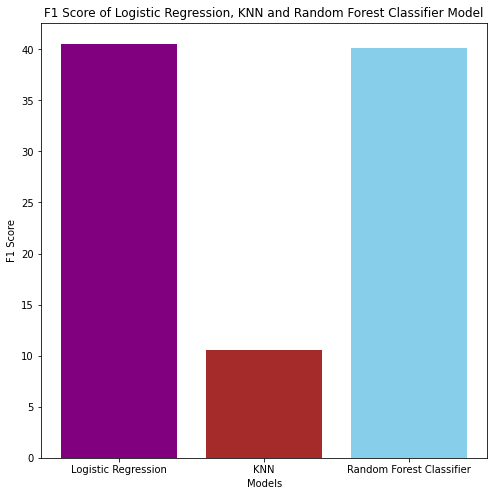

In [91]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['purple', 'brown', 'skyblue'])
plt.xlabel('Models')
plt.ylabel("F1 Score")
plt.title("F1 Score of Logistic Regression, KNN and Random Forest Classifier Model")
plt.show()